___
# Ciência dos Dados - PROJETO 1

### Rafael dos Santos 
### José Bechara
___

## Utilização da Internet entre os jovens e a sua relação com o nível de escolariadade

___
## Introdução

O objetivo deste trabalho é analizar do uso de Internet entre os estudantes de 5 a 30 anos. Com os resultados obtidos na análise é possível entender melhor a progressão educacional e econômica do país.<br>
Em nossa hipótese inicial acreditamos que com o aumento do acesso à Internet, há uma melhora significativa na educação, no crescimento econômico populacional e consequentemente no IDH (Índice de Desenvolvimento Humano).

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Se usar o arquivo descompactado
PES2015 = pd.read_csv('PES2015.csv',sep=',')

PES2011 = pd.read_csv('PES2011.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
#2015:
columns_2015 = ['UF','V0302','V8005',"V0601",'V6002','V6020',"V0605",'V6007','V0611','V06111','V4801','V4802','V4803','V4750']
names_2015 = ['UF','Sexo','Idade','sabe ler e escrever','escola publica ou privada', 'Area da rede publica de ensino', 'serie que frequenta','curso mais elevado que frequentou anteriormente','Concluiu este curso que frequentou anteriormente','Nos últimos 3 meses, utilizou a Internet em algum local','Nível de ensino, duração do ensino fundamental e série que frequentavam','Nível de ensino e grupos de séries do ensino fundamental que frequentavam',"Anos de estudo", "renda"]

aa = 0
df_2015 = PES2015[columns_2015]
for e, i in zip(columns_2015, names_2015):
    aa += 1
    print(aa,e, i)
    print("")
    
df_2015.columns = names_2015    

1 UF UF

2 V0302 Sexo

3 V8005 Idade

4 V0601 sabe ler e escrever

5 V6002 escola publica ou privada

6 V6020 Area da rede publica de ensino

7 V0605 serie que frequenta

8 V6007 curso mais elevado que frequentou anteriormente

9 V0611 Concluiu este curso que frequentou anteriormente

10 V06111 Nos últimos 3 meses, utilizou a Internet em algum local

11 V4801 Nível de ensino, duração do ensino fundamental e série que frequentavam

12 V4802 Nível de ensino e grupos de séries do ensino fundamental que frequentavam

13 V4803 Anos de estudo

14 V4750 renda



In [5]:
max(df_2015.renda)

999999999999.0

In [6]:
df_2015 = df_2015.loc[(df_2015['Idade']<30) & (df_2015['Idade']>5)]
df_2015 = df_2015.loc[(df_2015['renda']<999999999999.0)]

In [7]:
df_2015.head()

,UF,Sexo,Idade,sabe ler e escrever,escola publica ou privada,Area da rede publica de ensino,serie que frequenta,curso mais elevado que frequentou anteriormente,Concluiu este curso que frequentou anteriormente,"Nos últimos 3 meses, utilizou a Internet em algum local","Nível de ensino, duração do ensino fundamental e série que frequentavam",Nível de ensino e grupos de séries do ensino fundamental que frequentavam,Anos de estudo,renda
0,11,2,23,1,NaN,NaN,NaN,5.0,1.0,1.0,NaN,NaN,12,800.0
1,11,4,23,1,NaN,NaN,NaN,5.0,1.0,1.0,NaN,NaN,12,1150.0
4,11,4,11,1,4.0,NaN,5.0,NaN,NaN,1.0,16.0,7.0,4,793.0
5,11,4,7,1,2.0,2.0,3.0,NaN,NaN,NaN,14.0,7.0,2,793.0
7,11,4,18,1,NaN,NaN,NaN,5.0,1.0,1.0,NaN,NaN,12,793.0


In [8]:
#2015:

df_2015.loc[(df_2015.UF < 20), "Região"] = "Norte"
df_2015.loc[(df_2015.UF < 30) & (df_2015.UF > 20), "Região"] = "Nordeste"
df_2015.loc[(df_2015.UF < 40) & (df_2015.UF > 30), "Região"] = "Sudeste"
df_2015.loc[(df_2015.UF < 50) & (df_2015.UF > 40), "Região"] = "Sul"
df_2015.loc[(df_2015.UF > 50), "Região"] = "Centro Oeste"


df_2015.loc[(df_2015.UF == 11), "UF"] = "Rondonia"
df_2015.loc[(df_2015.UF == 12), "UF"] = "Acre"
df_2015.loc[(df_2015.UF == 13), "UF"] = "Amazonas"
df_2015.loc[(df_2015.UF == 14), "UF"] = "Roraima"
df_2015.loc[(df_2015.UF == 15), "UF"] = "Pará"
df_2015.loc[(df_2015.UF == 16), "UF"] = "Amapá"
df_2015.loc[(df_2015.UF == 17), "UF"] = "Tocantins"
df_2015.loc[(df_2015.UF == 21), "UF"] = "Maranhão"
df_2015.loc[(df_2015.UF == 22), "UF"] = "Piauí"
df_2015.loc[(df_2015.UF == 23), "UF"] = "Ceará"
df_2015.loc[(df_2015.UF == 24), "UF"] = "Rio Grande do Norte"
df_2015.loc[(df_2015.UF == 25), "UF"] = "Paraíba"
df_2015.loc[(df_2015.UF == 26), "UF"] = "Pernambuco"
df_2015.loc[(df_2015.UF == 27), "UF"] = "Alagoas"
df_2015.loc[(df_2015.UF == 28), "UF"] = "Sergipe"
df_2015.loc[(df_2015.UF == 29), "UF"] = "Bahia"
df_2015.loc[(df_2015.UF == 31), "UF"] = "Minas Gerais"
df_2015.loc[(df_2015.UF == 32), "UF"] = "Espírito Santo"
df_2015.loc[(df_2015.UF == 33), "UF"] = "Rio de Janeiro"
df_2015.loc[(df_2015.UF == 35), "UF"] = "São Paulo"
df_2015.loc[(df_2015.UF == 41), "UF"] = "Paraná"
df_2015.loc[(df_2015.UF == 42), "UF"] = "Santa Catarina"
df_2015.loc[(df_2015.UF == 43), "UF"] = "Rio Grande do Sul"
df_2015.loc[(df_2015.UF == 50), "UF"] = "Mato Grosso do Sul"
df_2015.loc[(df_2015.UF == 51), "UF"] = "Mato Grosso"
df_2015.loc[(df_2015.UF == 52), "UF"] = "Goiás"
df_2015.loc[(df_2015.UF == 53), "UF"] = "Distrito Federal"

df_2015.loc[(df_2015.Sexo == 2), 'Sexo'] = "Masculino"
df_2015.loc[(df_2015.Sexo == 4), 'Sexo'] = "Feminino"

df_2015.loc[(df_2015['sabe ler e escrever'] == 1), 'sabe ler e escrever'] = "Sim"
df_2015.loc[(df_2015['sabe ler e escrever'] == 3), 'sabe ler e escrever'] = "Não"

df_2015.loc[(df_2015['escola publica ou privada'] == 4), 'escola publica ou privada'] = "Privada"
df_2015.loc[(df_2015['escola publica ou privada'] == 2), 'escola publica ou privada'] = "Publica"
df_2015.loc[(df_2015['escola publica ou privada'].isnull() == True), 'escola publica ou privada'] = "Não Aplicavel"


df_2015.loc[(df_2015['Area da rede publica de ensino'] == 2), 'Area da rede publica de ensino'] = "Municipal"
df_2015.loc[(df_2015['Area da rede publica de ensino'] == 4), 'Area da rede publica de ensino'] = "Estadual"
df_2015.loc[(df_2015['Area da rede publica de ensino'] == 6), 'Area da rede publica de ensino'] = "Federal"
df_2015.loc[(df_2015['Area da rede publica de ensino'].isnull() == True), 'Area da rede publica de ensino'] = "Não Aplicavel"

df_2015.loc[(df_2015['serie que frequenta'] == 0), 'serie que frequenta'] = 9

df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 1), 'curso mais elevado que frequentou anteriormente'] = "Elementar (primário)"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 2), 'curso mais elevado que frequentou anteriormente'] = "Médio 1º ciclo (ginasial, etc.)"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 3), 'curso mais elevado que frequentou anteriormente'] = "Médio 2º ciclo (científico, clássico, etc.)"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 4), 'curso mais elevado que frequentou anteriormente'] = "Regular do ensino fundamental ou do 1º grau"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 5), 'curso mais elevado que frequentou anteriormente'] = "Regular do ensino médio ou do 2º grau"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 6), 'curso mais elevado que frequentou anteriormente'] = "Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 7), 'curso mais elevado que frequentou anteriormente'] = "Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 8), 'curso mais elevado que frequentou anteriormente'] = "Superior de graduação"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 9), 'curso mais elevado que frequentou anteriormente'] = "Mestrado ou doutorado"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 10), 'curso mais elevado que frequentou anteriormente'] = "Alfabetização de jovens e adultos"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 11), 'curso mais elevado que frequentou anteriormente'] = "Creche"
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 12), 'curso mais elevado que frequentou anteriormente'] = "Classe de alfabetização - CA "
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'] == 13), 'curso mais elevado que frequentou anteriormente'] = "Maternal, jardim de infância etc."
df_2015.loc[(df_2015['curso mais elevado que frequentou anteriormente'].isnull() == True), 'curso mais elevado que frequentou anteriormente'] = "Não aplicável"

df_2015.loc[(df_2015['Concluiu este curso que frequentou anteriormente'] == 1), 'Concluiu este curso que frequentou anteriormente'] = "Sim"
df_2015.loc[(df_2015['Concluiu este curso que frequentou anteriormente'] == 3), 'Concluiu este curso que frequentou anteriormente'] = "Não"
df_2015.loc[(df_2015['Concluiu este curso que frequentou anteriormente'].isnull() == True), 'Concluiu este curso que frequentou anteriormente'] = "Não Aplicavel"

df_2015.loc[(df_2015['Nos últimos 3 meses, utilizou a Internet em algum local'] == 1), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Sim"
df_2015.loc[(df_2015['Nos últimos 3 meses, utilizou a Internet em algum local'] == 3), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Não"
df_2015.loc[(df_2015['Nos últimos 3 meses, utilizou a Internet em algum local'].isnull() == True), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Não Aplicavel"

df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 1), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Maternal, jardim de infância etc."
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 2), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Classe de alfabetização"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 3), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Alfabetização de adultos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 4), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "1ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 5), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "2ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 6), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "3ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 7), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "4ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 8), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "5ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 9), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "6ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 10), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "7ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 11), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "8ª série do ensino fundamental regular em 8 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 12), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "1ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 13), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "2ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 14), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "3ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 15), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "4ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 16), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "5ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 17), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "6ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 18), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "7ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 19), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "8ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 20), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "9ª série do ensino fundamental regular em 9 anos"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 21), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Educação de jovens e adultos do ensino fundamental (seriado e não seriado)"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 22), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Regular do ensino médio "
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 23), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Educação de jovens e adultos do ensino médio"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 24), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Pré-vestibular"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 25), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Superior, inclusive mestrado e doutorado"
df_2015.loc[(df_2015['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'].isnull() == True), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Não Aplicavel"

df_2015.loc[(df_2015['Anos de estudo'] == 1), 'Anos de estudo'] = "Sem instrução e menos de 1 ano"
df_2015.loc[(df_2015['Anos de estudo'] == 2), 'Anos de estudo'] = "1ano"
df_2015.loc[(df_2015['Anos de estudo'] == 3), 'Anos de estudo'] = "2anos"
df_2015.loc[(df_2015['Anos de estudo'] == 4), 'Anos de estudo'] = "3anos"
df_2015.loc[(df_2015['Anos de estudo'] == 5), 'Anos de estudo'] = "4anos"
df_2015.loc[(df_2015['Anos de estudo'] == 6), 'Anos de estudo'] = "5anos"
df_2015.loc[(df_2015['Anos de estudo'] == 7), 'Anos de estudo'] = "6anos"
df_2015.loc[(df_2015['Anos de estudo'] == 8), 'Anos de estudo'] = "7anos"
df_2015.loc[(df_2015['Anos de estudo'] == 9), 'Anos de estudo'] = "8anos"
df_2015.loc[(df_2015['Anos de estudo'] == 10), 'Anos de estudo'] = "9anos"
df_2015.loc[(df_2015['Anos de estudo'] == 11), 'Anos de estudo'] = "10 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 12), 'Anos de estudo'] = "11 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 13), 'Anos de estudo'] = "12 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 14), 'Anos de estudo'] = "13 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 15), 'Anos de estudo'] = "14 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 16), 'Anos de estudo'] = "15 anos"
df_2015.loc[(df_2015['Anos de estudo'] == 17), 'Anos de estudo'] = "Não Determinado"
df_2015.loc[(df_2015['Anos de estudo'].isnull() == True), 'Anos de estudo'] = "Não Aplicavel"

In [9]:
df_2015.head()

,UF,Sexo,Idade,sabe ler e escrever,escola publica ou privada,Area da rede publica de ensino,serie que frequenta,curso mais elevado que frequentou anteriormente,Concluiu este curso que frequentou anteriormente,"Nos últimos 3 meses, utilizou a Internet em algum local","Nível de ensino, duração do ensino fundamental e série que frequentavam",Nível de ensino e grupos de séries do ensino fundamental que frequentavam,Anos de estudo,renda,Região
0,Rondonia,Masculino,23,Sim,Não Aplicavel,Não Aplicavel,NaN,Regular do ensino médio ou do 2º grau,Sim,Sim,NaN,Não Aplicavel,11 anos,800.0,Norte
1,Rondonia,Feminino,23,Sim,Não Aplicavel,Não Aplicavel,NaN,Regular do ensino médio ou do 2º grau,Sim,Sim,NaN,Não Aplicavel,11 anos,1150.0,Norte
4,Rondonia,Feminino,11,Sim,Privada,Não Aplicavel,5.0,Não aplicável,Não Aplicavel,Sim,16.0,4ª série do ensino fundamental regular em 8 anos,3anos,793.0,Norte
5,Rondonia,Feminino,7,Sim,Publica,Municipal,3.0,Não aplicável,Não Aplicavel,Não Aplicavel,14.0,4ª série do ensino fundamental regular em 8 anos,1ano,793.0,Norte
7,Rondonia,Feminino,18,Sim,Não Aplicavel,Não Aplicavel,NaN,Regular do ensino médio ou do 2º grau,Sim,Sim,NaN,Não Aplicavel,11 anos,793.0,Norte


In [10]:
#2011:
columns_2011 = ['UF','V0302','V8005',"V0601",'V6002','V6020',"V0605",'V6007','V0611','V06111','V4801','V4802','V4803','V4750']
names_2011 = ['UF','Sexo','Idade','sabe ler e escrever','escola publica ou privada', 'Area da rede publica de ensino', 'serie que frequenta','curso mais elevado que frequentou anteriormente','Concluiu este curso que frequentou anteriormente','Nos últimos 3 meses, utilizou a Internet em algum local','Nível de ensino, duração do ensino fundamental e série que frequentavam','Nível de ensino e grupos de séries do ensino fundamental que frequentavam',"Anos de estudo", 'renda']

df_2011 = PES2011[columns_2011]

contador = 0
for e, i in zip(columns_2011, names_2011):
    contador += 1
    print(contador,e, i)
    print("")
    
df_2011.columns = names_2011
df_2011 = df_2011.loc[(df_2011['Idade']<30) & (df_2011['Idade']>5)]
df_2011 = df_2011.loc[(df_2011['renda'] < 999999999999.0)]

1 UF UF

2 V0302 Sexo

3 V8005 Idade

4 V0601 sabe ler e escrever

5 V6002 escola publica ou privada

6 V6020 Area da rede publica de ensino

7 V0605 serie que frequenta

8 V6007 curso mais elevado que frequentou anteriormente

9 V0611 Concluiu este curso que frequentou anteriormente

10 V06111 Nos últimos 3 meses, utilizou a Internet em algum local

11 V4801 Nível de ensino, duração do ensino fundamental e série que frequentavam

12 V4802 Nível de ensino e grupos de séries do ensino fundamental que frequentavam

13 V4803 Anos de estudo

14 V4750 renda



In [11]:
#2015:

df_2011.loc[(df_2011.UF < 20), "Região"] = "Norte"
df_2011.loc[(df_2011.UF < 30) & (df_2011.UF > 20), "Região"] = "Nordeste"
df_2011.loc[(df_2011.UF < 40) & (df_2011.UF > 30), "Região"] = "Sudeste"
df_2011.loc[(df_2011.UF < 50) & (df_2011.UF > 40), "Região"] = "Sul"
df_2011.loc[(df_2011.UF > 50), "Região"] = "Centro Oeste"

df_2011.loc[(df_2011.UF == 11), "UF"] = "Rondonia"
df_2011.loc[(df_2011.UF == 12), "UF"] = "Acre"
df_2011.loc[(df_2011.UF == 13), "UF"] = "Amazonas"
df_2011.loc[(df_2011.UF == 14), "UF"] = "Roraima"
df_2011.loc[(df_2011.UF == 15), "UF"] = "Pará"
df_2011.loc[(df_2011.UF == 16), "UF"] = "Amapá"
df_2011.loc[(df_2011.UF == 17), "UF"] = "Tocantins"
df_2011.loc[(df_2011.UF == 21), "UF"] = "Maranhão"
df_2011.loc[(df_2011.UF == 22), "UF"] = "Piauí"
df_2011.loc[(df_2011.UF == 23), "UF"] = "Ceará"
df_2011.loc[(df_2011.UF == 24), "UF"] = "Rio Grande do Norte"
df_2011.loc[(df_2011.UF == 25), "UF"] = "Paraíba"
df_2011.loc[(df_2011.UF == 26), "UF"] = "Pernambuco"
df_2011.loc[(df_2011.UF == 27), "UF"] = "Alagoas"
df_2011.loc[(df_2011.UF == 28), "UF"] = "Sergipe"
df_2011.loc[(df_2011.UF == 29), "UF"] = "Bahia"
df_2011.loc[(df_2011.UF == 31), "UF"] = "Minas Gerais"
df_2011.loc[(df_2011.UF == 32), "UF"] = "Espírito Santo"
df_2011.loc[(df_2011.UF == 33), "UF"] = "Rio de Janeiro"
df_2011.loc[(df_2011.UF == 35), "UF"] = "São Paulo"
df_2011.loc[(df_2011.UF == 41), "UF"] = "Paraná"
df_2011.loc[(df_2011.UF == 42), "UF"] = "Santa Catarina"
df_2011.loc[(df_2011.UF == 43), "UF"] = "Rio Grande do Sul"
df_2011.loc[(df_2011.UF == 50), "UF"] = "Mato Grosso do Sul"
df_2011.loc[(df_2011.UF == 51), "UF"] = "Mato Grosso"
df_2011.loc[(df_2011.UF == 52), "UF"] = "Goiás"
df_2011.loc[(df_2011.UF == 53), "UF"] = "Distrito Federal"

df_2011.loc[(df_2011.Sexo == 2), 'Sexo'] = "Masculino"
df_2011.loc[(df_2011.Sexo == 4), 'Sexo'] = "Feminino"

df_2011.loc[(df_2011['sabe ler e escrever'] == 1), 'sabe ler e escrever'] = "Sim"
df_2011.loc[(df_2011['sabe ler e escrever'] == 3), 'sabe ler e escrever'] = "Não"

df_2011.loc[(df_2011['escola publica ou privada'] == 4), 'escola publica ou privada'] = "Privada"
df_2011.loc[(df_2011['escola publica ou privada'] == 2), 'escola publica ou privada'] = "Publica"
df_2011.loc[(df_2011['escola publica ou privada'].isnull() == True), 'escola publica ou privada'] = "Não Aplicavel"


df_2011.loc[(df_2011['Area da rede publica de ensino'] == 2), 'Area da rede publica de ensino'] = "Municipal"
df_2011.loc[(df_2011['Area da rede publica de ensino'] == 4), 'Area da rede publica de ensino'] = "Estadual"
df_2011.loc[(df_2011['Area da rede publica de ensino'] == 6), 'Area da rede publica de ensino'] = "Federal"
df_2011.loc[(df_2011['Area da rede publica de ensino'].isnull() == True), 'Area da rede publica de ensino'] = "Não Aplicavel"

df_2011.loc[(df_2011['serie que frequenta'] == 0), 'serie que frequenta'] = 9

df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 1), 'curso mais elevado que frequentou anteriormente'] = "Elementar (primário)"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 2), 'curso mais elevado que frequentou anteriormente'] = "Médio 1º ciclo (ginasial, etc.)"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 3), 'curso mais elevado que frequentou anteriormente'] = "Médio 2º ciclo (científico, clássico, etc.)"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 4), 'curso mais elevado que frequentou anteriormente'] = "Regular do ensino fundamental ou do 1º grau"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 5), 'curso mais elevado que frequentou anteriormente'] = "Regular do ensino médio ou do 2º grau"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 6), 'curso mais elevado que frequentou anteriormente'] = "Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 7), 'curso mais elevado que frequentou anteriormente'] = "Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 8), 'curso mais elevado que frequentou anteriormente'] = "Superior de graduação"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 9), 'curso mais elevado que frequentou anteriormente'] = "Mestrado ou doutorado"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 10), 'curso mais elevado que frequentou anteriormente'] = "Alfabetização de jovens e adultos"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 11), 'curso mais elevado que frequentou anteriormente'] = "Creche"
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 12), 'curso mais elevado que frequentou anteriormente'] = "Classe de alfabetização - CA "
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'] == 13), 'curso mais elevado que frequentou anteriormente'] = "Maternal, jardim de infância etc."
df_2011.loc[(df_2011['curso mais elevado que frequentou anteriormente'].isnull() == True), 'curso mais elevado que frequentou anteriormente'] = "Não aplicável"

df_2011.loc[(df_2011['Concluiu este curso que frequentou anteriormente'] == 1), 'Concluiu este curso que frequentou anteriormente'] = "Sim"
df_2011.loc[(df_2011['Concluiu este curso que frequentou anteriormente'] == 3), 'Concluiu este curso que frequentou anteriormente'] = "Não"
df_2011.loc[(df_2011['Concluiu este curso que frequentou anteriormente'].isnull() == True), 'Concluiu este curso que frequentou anteriormente'] = "Não Aplicavel"

df_2011.loc[(df_2011['Nos últimos 3 meses, utilizou a Internet em algum local'] == 1), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Sim"
df_2011.loc[(df_2011['Nos últimos 3 meses, utilizou a Internet em algum local'] == 3), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Não"
df_2011.loc[(df_2011['Nos últimos 3 meses, utilizou a Internet em algum local'].isnull() == True), 'Nos últimos 3 meses, utilizou a Internet em algum local'] = "Não Aplicavel"

df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 1), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Maternal, jardim de infância etc."
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 2), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Classe de alfabetização"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 3), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Alfabetização de adultos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 4), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "1ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 5), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "2ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 6), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "3ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 7), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "4ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 8), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "5ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 9), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "6ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 10), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "7ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 11), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "8ª série do ensino fundamental regular em 8 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 12), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "1ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 13), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "2ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 14), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "3ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 15), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "4ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 16), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "5ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 17), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "6ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 18), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "7ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 19), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "8ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 20), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "9ª série do ensino fundamental regular em 9 anos"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 21), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Educação de jovens e adultos do ensino fundamental (seriado e não seriado)"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 22), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Regular do ensino médio "
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 23), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Educação de jovens e adultos do ensino médio"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 24), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Pré-vestibular"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] == 25), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Superior, inclusive mestrado e doutorado"
df_2011.loc[(df_2011['Nível de ensino e grupos de séries do ensino fundamental que frequentavam'].isnull() == True), 'Nível de ensino e grupos de séries do ensino fundamental que frequentavam'] = "Não Aplicavel"

df_2011.loc[(df_2011['Anos de estudo'] == 1), 'Anos de estudo'] = "Sem instrução e menos de 1 ano"
df_2011.loc[(df_2011['Anos de estudo'] == 2), 'Anos de estudo'] = "1ano"
df_2011.loc[(df_2011['Anos de estudo'] == 3), 'Anos de estudo'] = "2anos"
df_2011.loc[(df_2011['Anos de estudo'] == 4), 'Anos de estudo'] = "3anos"
df_2011.loc[(df_2011['Anos de estudo'] == 5), 'Anos de estudo'] = "4anos"
df_2011.loc[(df_2011['Anos de estudo'] == 6), 'Anos de estudo'] = "5anos"
df_2011.loc[(df_2011['Anos de estudo'] == 7), 'Anos de estudo'] = "6anos"
df_2011.loc[(df_2011['Anos de estudo'] == 8), 'Anos de estudo'] = "7anos"
df_2011.loc[(df_2011['Anos de estudo'] == 9), 'Anos de estudo'] = "8anos"
df_2011.loc[(df_2011['Anos de estudo'] == 10), 'Anos de estudo'] = "9anos"
df_2011.loc[(df_2011['Anos de estudo'] == 11), 'Anos de estudo'] = "10 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 12), 'Anos de estudo'] = "11 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 13), 'Anos de estudo'] = "12 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 14), 'Anos de estudo'] = "13 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 15), 'Anos de estudo'] = "14 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 16), 'Anos de estudo'] = "15 anos"
df_2011.loc[(df_2011['Anos de estudo'] == 17), 'Anos de estudo'] = "Não Determinado"
df_2011.loc[(df_2011['Anos de estudo'].isnull() == True), 'Anos de estudo'] = "Não Aplicavel"

In [12]:
aa = []
for e in df_2011['renda']:
    try:
        aa.append(int(e))
    except:
        aa.append('0')
df_2011['renda'] = aa

In [13]:
df_2011.head()

,UF,Sexo,Idade,sabe ler e escrever,escola publica ou privada,Area da rede publica de ensino,serie que frequenta,curso mais elevado que frequentou anteriormente,Concluiu este curso que frequentou anteriormente,"Nos últimos 3 meses, utilizou a Internet em algum local","Nível de ensino, duração do ensino fundamental e série que frequentavam",Nível de ensino e grupos de séries do ensino fundamental que frequentavam,Anos de estudo,renda,Região
5,Rondonia,Masculino,22,Sim,Não Aplicavel,Não Aplicavel,NaN,Regular do ensino médio ou do 2º grau,Sim,Sim,NaN,Não Aplicavel,11 anos,1461,Norte
6,Rondonia,Feminino,17,Sim,Publica,Estadual,3.0,Não aplicável,Não Aplicavel,Sim,22.0,7ª série do ensino fundamental regular em 8 anos,10 anos,1461,Norte
7,Rondonia,Feminino,10,Sim,Publica,Estadual,6.0,Não aplicável,Não Aplicavel,Sim,17.0,5ª série do ensino fundamental regular em 8 anos,4anos,1461,Norte
12,Rondonia,Feminino,17,Sim,Publica,Estadual,3.0,Não aplicável,Não Aplicavel,Sim,22.0,7ª série do ensino fundamental regular em 8 anos,10 anos,1000,Norte
13,Rondonia,Masculino,12,Sim,Publica,Estadual,6.0,Não aplicável,Não Aplicavel,Sim,17.0,5ª série do ensino fundamental regular em 8 anos,4anos,1000,Norte


___
## Análise e Resultados

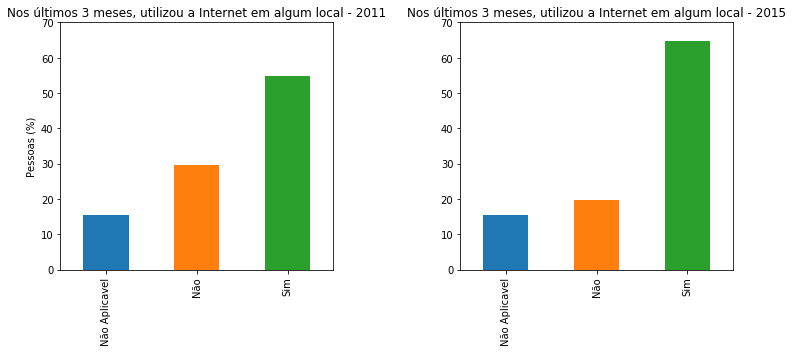

2011:
Mulheres: 50.05 % | Homens: 49.95 %

2015:
Mulheres: 50.73 % | Homens: 49.27 %



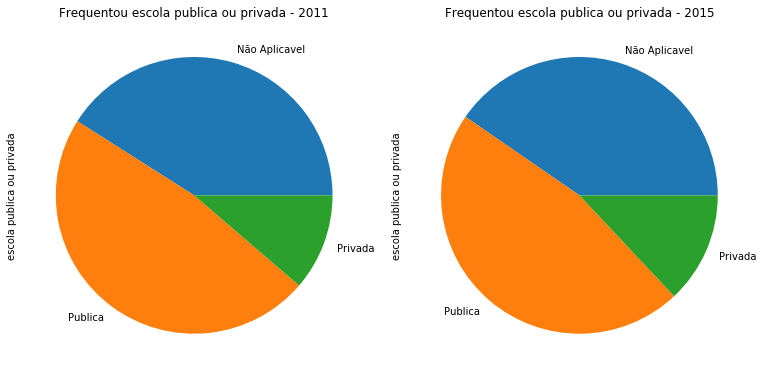

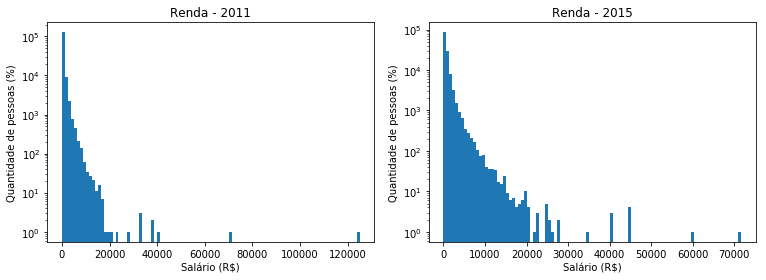

In [25]:
# fig = plt.figure(figsize=(16,4))

# plt.subplot(131)
# df_2011['serie que frequenta'].plot(kind = "hist", bins=20, sharex = True, sharey = True)
# plt.title("Série que frequenta - 2011")
# plt.ylabel("Número de pessoas")
# plt.xlabel("Série")

# plt.subplot(132)
# df_2015['serie que frequenta'].plot(kind = "hist", bins=20, sharex = True, sharey = True)
# plt.title("Série que frequenta - 2015")
# plt.ylabel("Número de pessoas")
# plt.xlabel("Série")

# plt.tight_layout()
# plt.show()


fig = plt.figure(figsize=(16,5))

y_ticks = [10*x for x in range(8)]

plt.subplot(131)
ut1 = (df_2011['Nos últimos 3 meses, utilizou a Internet em algum local'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut1.plot(kind='bar', title = "Nos últimos 3 meses, utilizou a Internet em algum local - 2011", yticks=y_ticks)
plt.ylabel("Pessoas (%)")

plt.subplot(132)
ut2 = (df_2015['Nos últimos 3 meses, utilizou a Internet em algum local'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2.plot(kind='bar', title = "Nos últimos 3 meses, utilizou a Internet em algum local - 2015", yticks=y_ticks)

plt.tight_layout()
plt.show()


# fig = plt.figure(figsize=(16,5.5))

# plt.subplot(131)
# sexo_2011 = (df_2011['Sexo'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
# sexo_2011.plot(kind='pie', title = "Sexo - 2011")

# plt.subplot(132)
# sexo_2015 = (df_2015['Sexo'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
# sexo_2015.plot(kind='pie', title = "Sexo - 2015")

# plt.tight_layout()
# plt.show()

total_2011 = df_2011["Sexo"].value_counts().sum()
masc_2011 = df_2011["Sexo"].loc[df_2011["Sexo"]=="Masculino"].value_counts()[0]
# print("Homens - 2011: {0:.2f} %".format((masc_2011/total_2011)*100))

fem_2011 = df_2011["Sexo"].loc[df_2011["Sexo"]=="Feminino"].value_counts()[0]
print("2011:")
print("Mulheres: {0:.2f} % | Homens: {1:.2f} %".format((masc_2011/total_2011)*100,(fem_2011/total_2011)*100))

total_2015 = df_2015["Sexo"].value_counts().sum()
masc_2015 = df_2015["Sexo"].loc[df_2015["Sexo"]=="Masculino"].value_counts()[0]
# print("Homens - 2015: {0:.2f} %".format((masc_2015/total_2015)*100))

print("")
print("2015:")
fem_2015 = df_2015["Sexo"].loc[df_2015["Sexo"]=="Feminino"].value_counts()[0]
print("Mulheres: {0:.2f} % | Homens: {1:.2f} %".format((masc_2015/total_2015)*100,(fem_2015/total_2015)*100))

print("")


fig = plt.figure(figsize=(16,5.5))

plt.subplot(131)
escola_2011 = (df_2011['escola publica ou privada'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
escola_2011.plot(kind='pie', title = "Frequentou escola publica ou privada - 2011")

plt.subplot(132)
escola_2015 = (df_2015['escola publica ou privada'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
escola_2015.plot(kind='pie', title = "Frequentou escola publica ou privada - 2015")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(16,4))

plt.subplot(131)
df_2011['renda'].plot(kind = "hist", log = True, bins = 100);
plt.title("Renda - 2011")
plt.ylabel("Quantidade de pessoas (%)")
plt.xlabel("Salário (R$)")

plt.subplot(132)
df_2015['renda'].plot(kind = "hist", log = True, bins = 100);
plt.title("Renda - 2015")
plt.ylabel("Quantidade de pessoas (%)")
plt.xlabel("Salário (R$)")

plt.tight_layout()
plt.show()


ct2011 = pd.crosstab(df_2011["sabe ler e escrever"], df_2011["Nos últimos 3 meses, utilizou a Internet em algum local"])
ct2011.drop(columns="Não Aplicavel", inplace=True)

ct2015 = pd.crosstab(df_2015["sabe ler e escrever"], df_2015["Nos últimos 3 meses, utilizou a Internet em algum local"])
ct2015.drop(columns="Não Aplicavel", inplace=True)

In [27]:
print("2011:")
ct2011

2011:


"Nos últimos 3 meses, utilizou a Internet em algum local",Não,Sim
sabe ler e escrever,,
Não,2244,67
Sim,39054,76152


In [28]:
print("2015:")
ct2015

2015:


"Nos últimos 3 meses, utilizou a Internet em algum local",Não,Sim
sabe ler e escrever,,
Não,1421,97
Sim,24447,85148


___
## Conclusão 

Ao analizarmos os gráficos confirmamos a nossa hipótese de que quem tem acesso a internet, é mais rico, logo n estuda nas escola falida publica